In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
df = pd.read_csv("laptop_price.csv")

In [6]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Dropping columns that arent needed 

In [9]:
df.drop(columns = 'laptop_ID', inplace = True)

In [10]:

cat_vars = ['Company', 'TypeName', 'Memory', 'Ram', 'ScreenResolution', 'OpSys']

In [11]:
def plot_cat_var(df, var):
    df = df.copy()
    print(f'Number of {var}: ',df[var].nunique())
    print(f'Laptop\'s {var}: ', df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} By The Sale Price')
    sns.barplot(
        x = var,
        y = 'Price_euros',
        data = df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price in euros')
    plt.show()

Number of Company:  19
Laptop's Company:  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


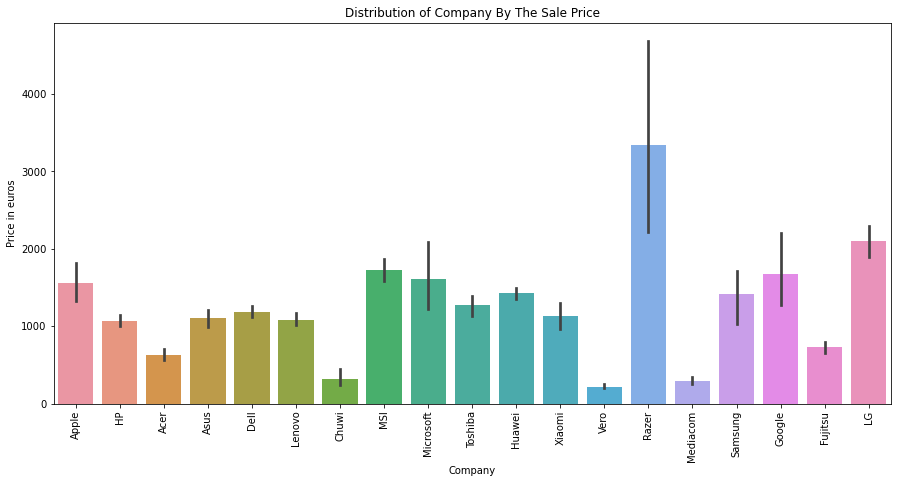

Number of TypeName:  6
Laptop's TypeName:  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


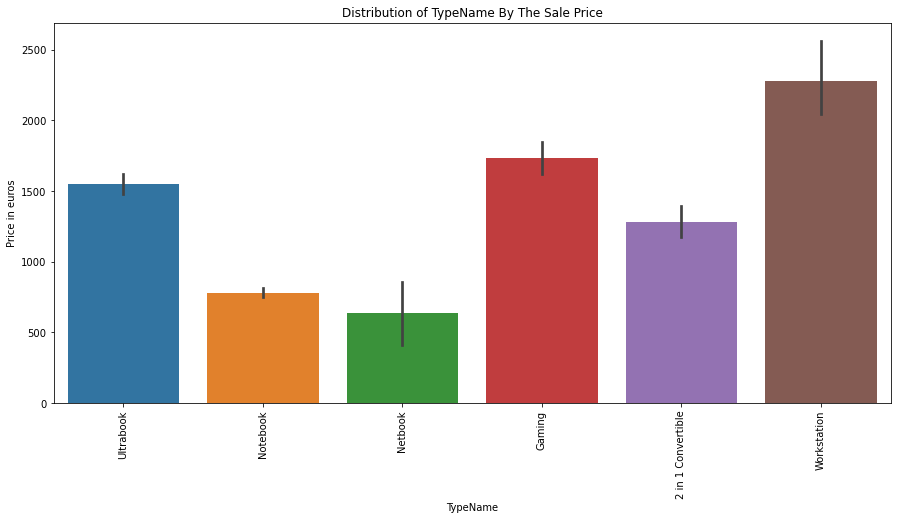

Number of Memory:  39
Laptop's Memory:  ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


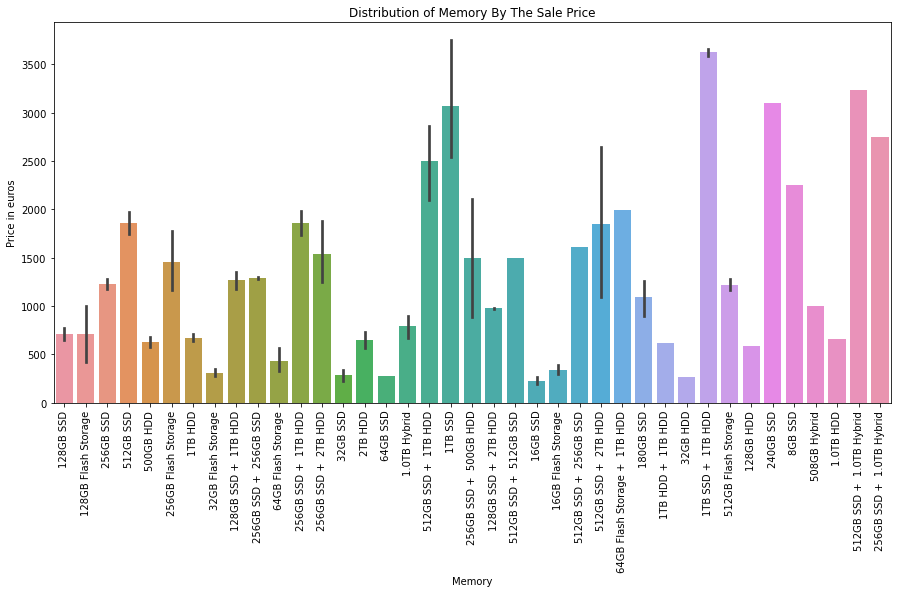

Number of Ram:  9
Laptop's Ram:  ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


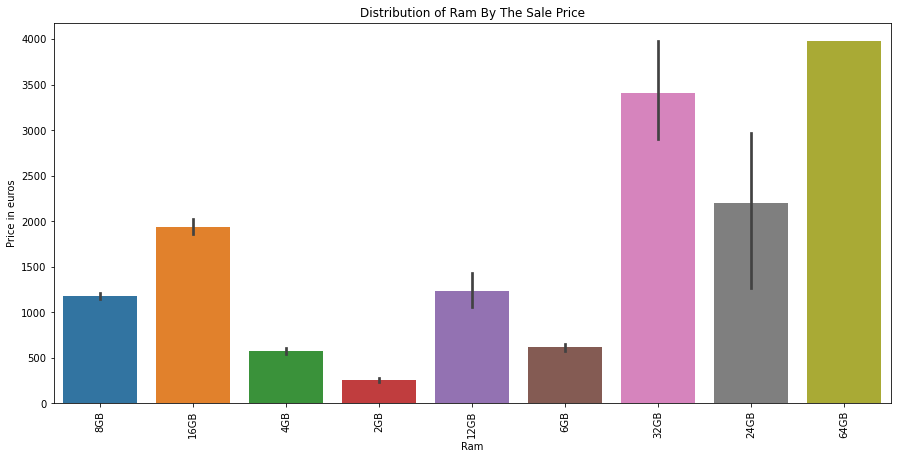

Number of ScreenResolution:  40
Laptop's ScreenResolution:  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscre

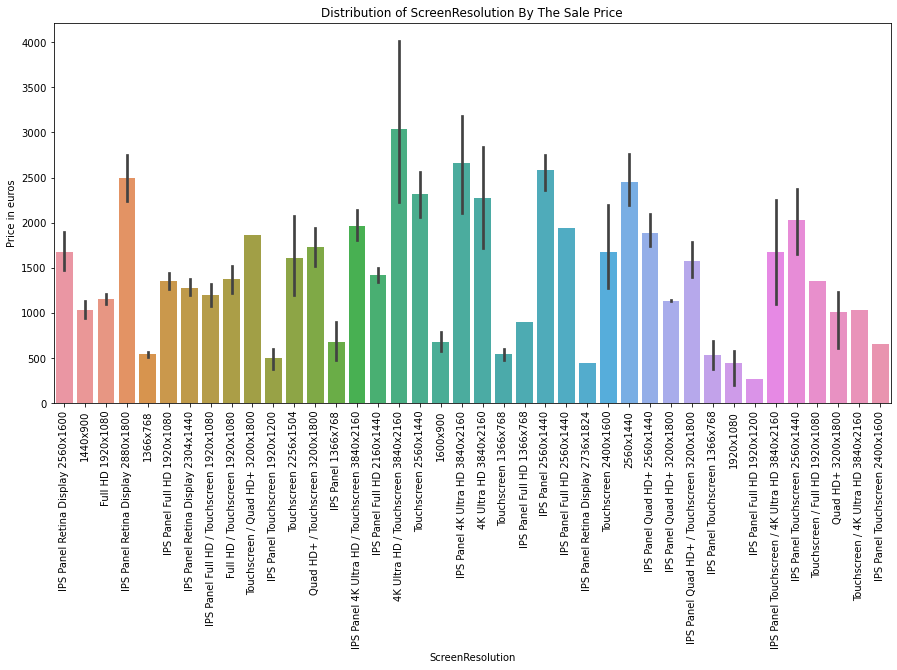

Number of OpSys:  9
Laptop's OpSys:  ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


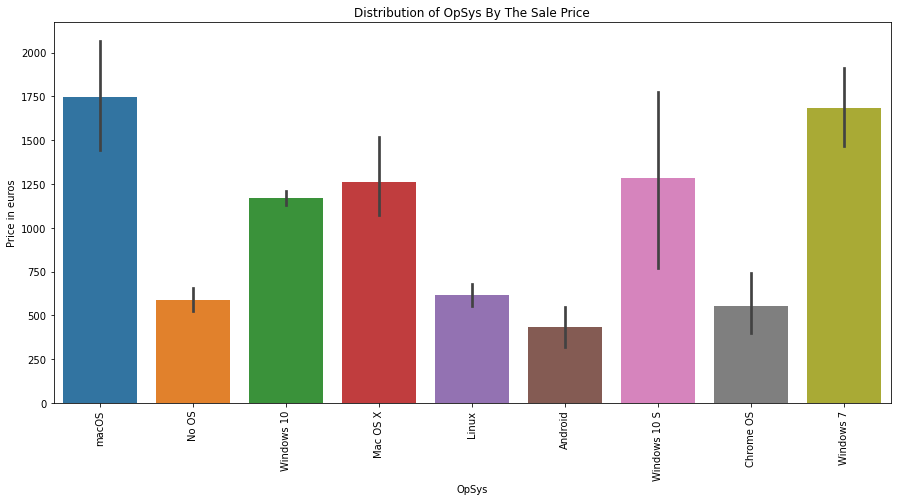

In [12]:
for var in cat_vars:
    plot_cat_var(df, var)
    

In [13]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].astype(float)
df['Ram'] = df['Ram'].astype(int)

In [14]:
df['Cpu_freq'] = df['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')

In [15]:
df['Cpu_freq'] = df['Cpu_freq'].str.replace('GHz','').astype('float64')

In [16]:
df['Memory_Size'] = df.Memory.str.extract(r'(\d+GB|\d+TB)')

In [17]:
df['Memory_Size'] = df.Memory_Size.str.extract(r'(\d+)').astype('int64')

In [18]:
df["Memory"] = df["Memory"].str.replace('GB', ' ')
df["Memory"] = df["Memory"].str.replace('TB', '000')
sliced = df["Memory"].str.split(" ", n = 1, expand = True)
df['storage']=sliced[0]
df['storage_type']=sliced[1]
df=df.drop('Memory',axis=1)

In [19]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [20]:
df['ScreenResolution'] = df.ScreenResolution.str.extract(r'(\d+x\d+)')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price_euros       1303 non-null   float64
 11  Cpu_freq          1303 non-null   float64
 12  Memory_Size       1303 non-null   int64  
 13  storage           1303 non-null   object 
 14  storage_type      1303 non-null   object 
 15  Touchscreen       1303 non-null   int64  
 16  Ips               1303 non-null   int64  


In [22]:
x = "Price_euros"
y = "Company"

<AxesSubplot:xlabel='Price_euros', ylabel='Company'>

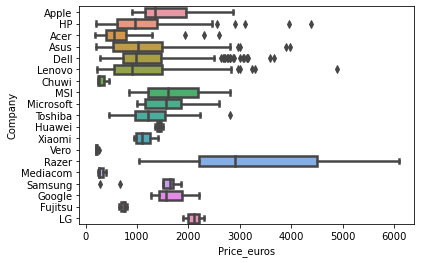

In [23]:
sns.boxplot(data = df, y = y, x = x,linewidth=2.5)

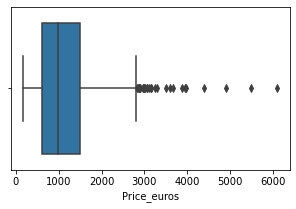

In [24]:
fig, ax  = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='Price_euros', data=df)

C:\Users\124ab\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


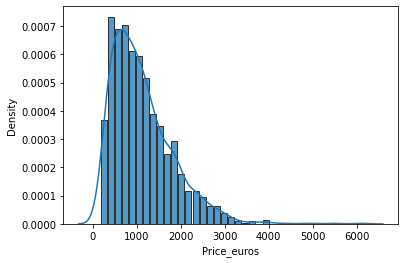

In [25]:
sns.distplot(df['Price_euros'], hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

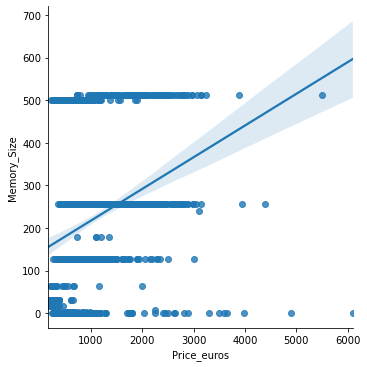

In [28]:
sns.lmplot(data=df, x="Price_euros", y="Memory_Size")

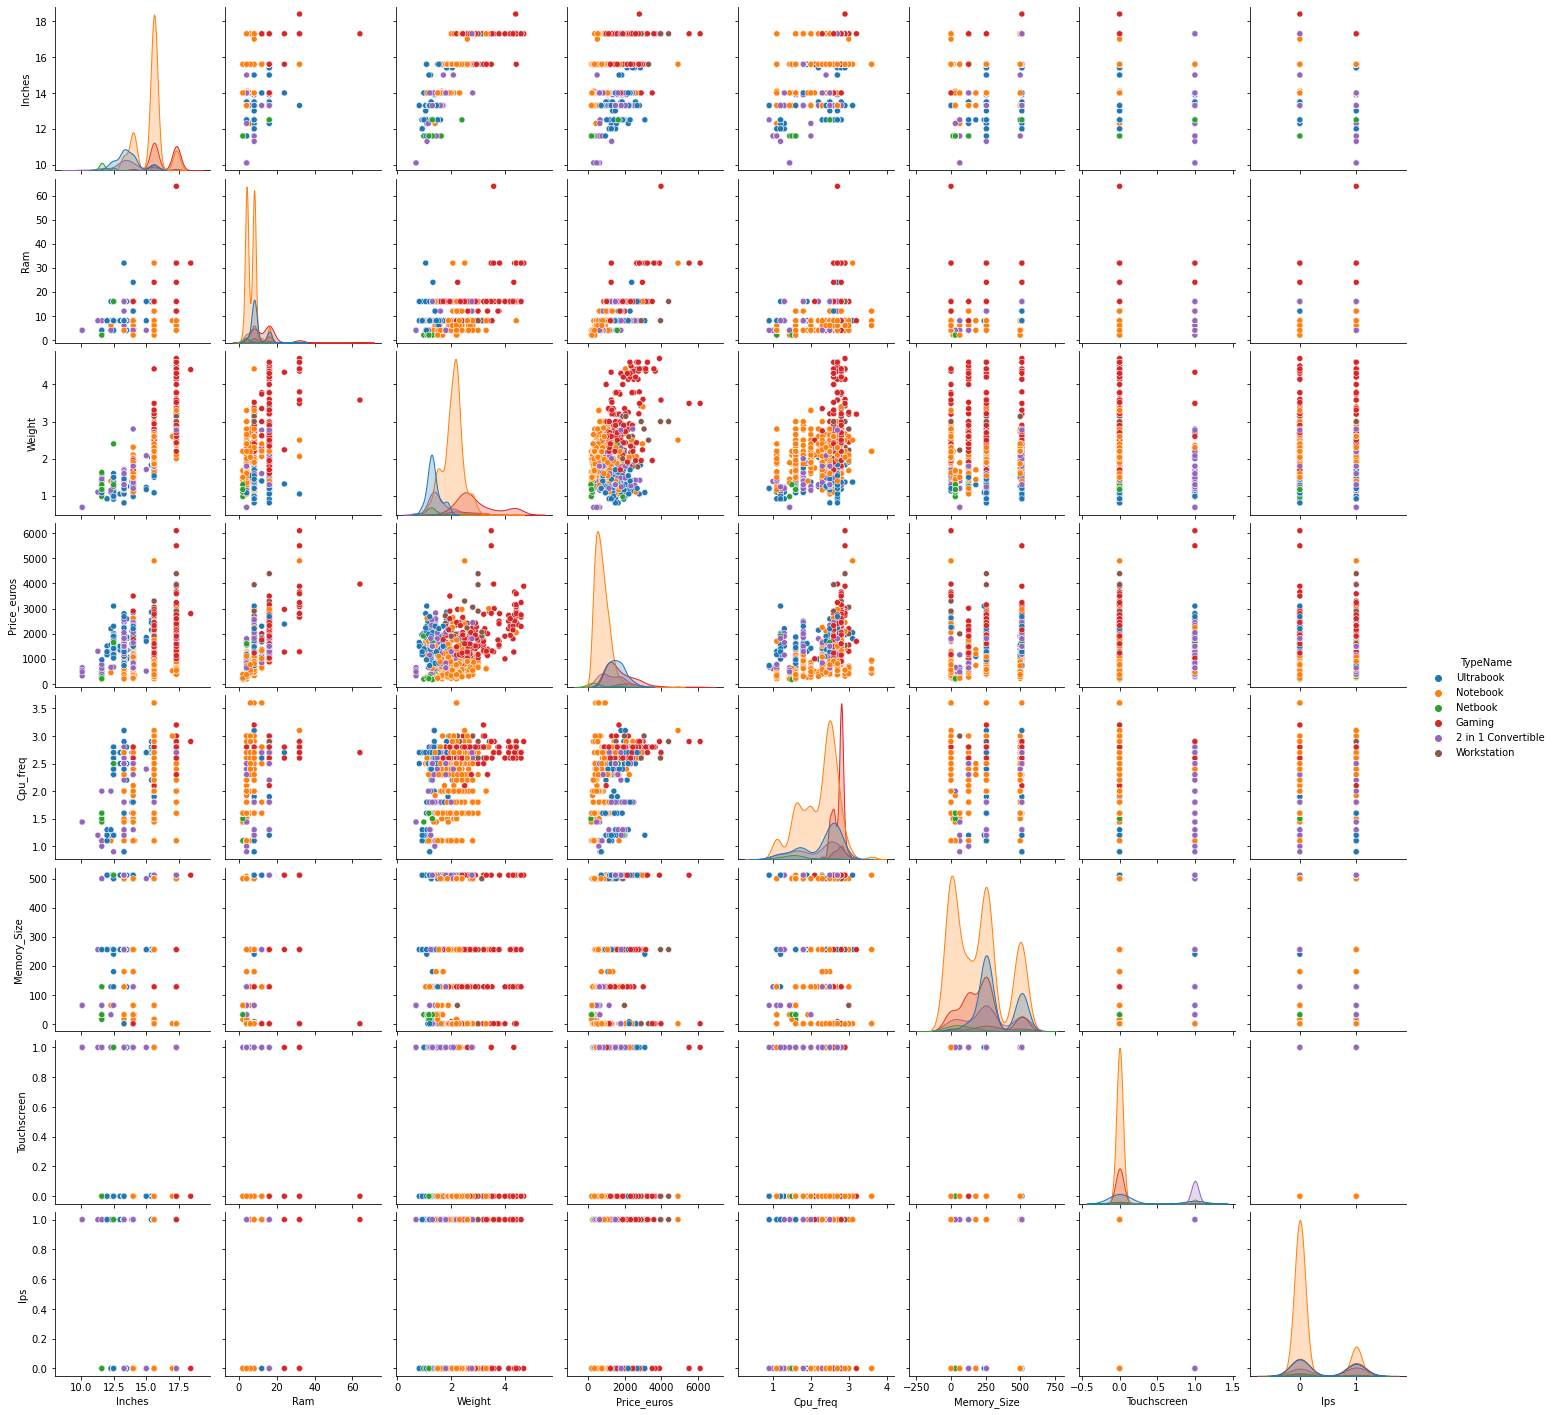

In [30]:
sns.pairplot(data=df, hue="TypeName")

In [19]:
df1 = df.drop(['Cpu'], axis= 1)

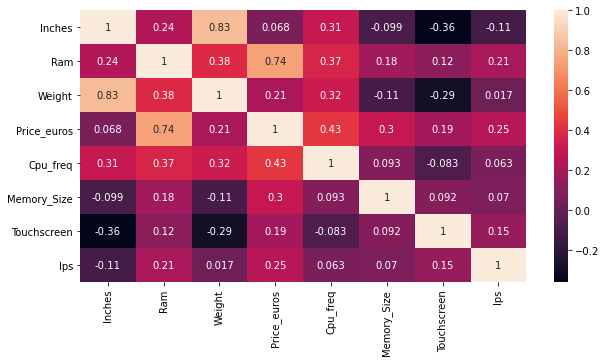

In [20]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Which resolution do the customers prefer?

NameError: name 'mtick' is not defined

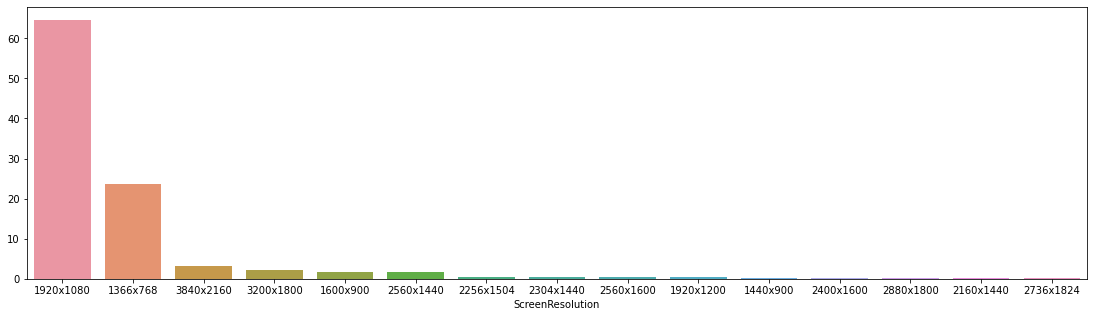

In [25]:
resolution_sales = df1.groupby(by = 'ScreenResolution').count().sort_values(by = 'Company', ascending = False)

res_pct = list(map(lambda x: (x/1302)*100, resolution_sales.Company))

fig, ax3 = plt.subplots(figsize = (19,5))
sns.barplot(data = resolution_sales, x = resolution_sales.index, y = res_pct)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 90)
plt.show()

## Which company has higher sales?

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

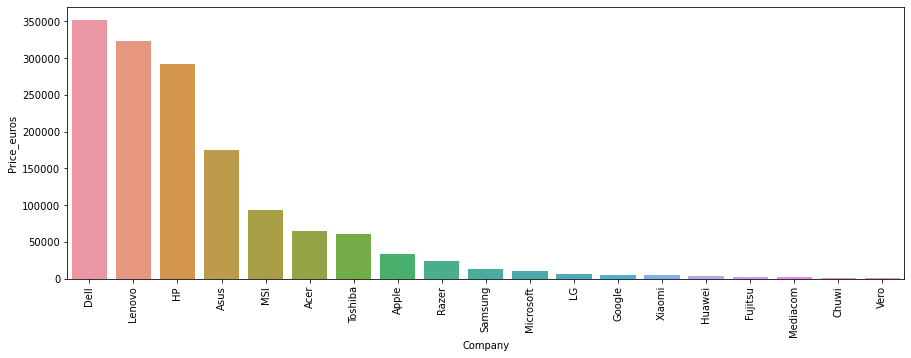

In [61]:
company_sales = df1.groupby('Company').sum().sort_values(by = 'Price_euros', ascending = False)
company_sales
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data = company_sales, x= company_sales.index , y= 'Price_euros')

In [26]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)


In [27]:
df['res_x']=new[0]
df['res_y']=new[1]

In [28]:
df['res_x']=df['res_x'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [29]:
df=df.drop('ScreenResolution',axis=1)

# Regression Analysis With Sklearn 

In [30]:
df

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_freq,Memory_Size,storage,storage_type,Touchscreen,Ips,res_x,res_y
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,128,128,SSD,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,128,128,Flash Storage,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,2.5,256,256,SSD,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,512,512,SSD,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,256,256,SSD,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,2.5,128,128,SSD,1,1,1920,1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,2.5,512,512,SSD,1,1,3200,1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,1.6,64,64,Flash Storage,0,0,1366,768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,2.5,1,1000,HDD,0,0,1366,768


In [31]:
X=df.drop('Price_euros',axis=1)
Y=pd.DataFrame(df['Price_euros'],columns=['Price_euros'])

In [32]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
les={}
for cols in X.drop(['Weight','Ram','Inches','storage','res_x','res_y','Ips','Touchscreen'],axis=1).columns:
    les[cols]=LabelEncoder()
    X[cols]= les[cols].fit_transform(X[cols])

In [33]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [34]:
df1=pd.concat([X,Y],axis=1)
df1

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Cpu_freq,Memory_Size,storage,storage_type,Touchscreen,Ips,res_x,res_y,Price_euros
0,-1.333189,-0.047766,1.138779,-1.204407,-0.475914,-0.075195,0.153493,3.083616,-1.005283,0.017431,-0.226766,-0.865234,-0.415064,-0.415713,1.603079,1.345362,1.860586,1339.69
1,-1.333189,-0.041946,1.138779,-1.204407,-0.555339,-0.075195,-0.170358,3.083616,-1.050381,-1.157366,-0.226766,-0.865234,-1.616907,-0.415713,-0.623799,-0.919776,-0.600648,898.94
2,0.136477,-1.502761,0.335406,0.408772,-0.118498,-0.075195,-0.077829,-0.781657,-0.268684,0.409030,0.528928,-0.504425,-0.415064,-0.415713,-0.623799,0.050997,0.032241,575.00
3,-1.333189,-0.047766,1.138779,0.268495,0.318342,1.498767,-2.113462,3.083616,-0.313782,0.800629,1.284621,0.217194,-0.415064,-0.415713,1.603079,1.992544,2.563795,2537.45
4,-1.333189,-0.047766,1.138779,-1.204407,-0.396488,-0.075195,0.199757,3.083616,-1.005283,1.583827,0.528928,-0.504425,-0.415064,-0.415713,1.603079,1.345362,1.860586,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.871310,1.581829,-2.074710,-0.713439,0.477194,-0.862176,-0.355416,0.184661,-0.358880,0.409030,-0.226766,-0.865234,-0.415064,2.405506,1.603079,0.050997,0.032241,638.00
1299,0.871310,1.628389,-2.074710,-1.204407,0.477194,1.498767,-0.355416,0.184661,-1.110512,0.409030,1.284621,0.217194,-0.415064,2.405506,1.603079,2.639726,2.563795,1499.00
1300,0.871310,-0.653044,0.335406,-0.713439,-1.707010,-1.255667,-0.679266,0.184661,-0.809859,-1.353165,-0.478664,-1.045639,-1.616907,-0.415713,-0.623799,-1.069437,-1.064766,229.00
1301,0.136477,-1.782120,0.335406,0.408772,0.477194,-0.468686,-1.558290,0.184661,0.227393,0.409030,-1.738153,1.592781,1.688159,-0.415713,-0.623799,-1.069437,-1.064766,764.00


In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=5)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=lr.predict(x_test)

In [38]:
lr.score(x_train,y_train)

0.7201403526170341

In [39]:
lr.score(x_test,y_test)

0.7773282297160352

# Stats model 

In [40]:
from pandas import DataFrame
import statsmodels.api as sm

In [41]:
df

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_freq,Memory_Size,storage,storage_type,Touchscreen,Ips,res_x,res_y
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,128,128,SSD,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,128,128,Flash Storage,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,2.5,256,256,SSD,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,512,512,SSD,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,256,256,SSD,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,2.5,128,128,SSD,1,1,1920,1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,2.5,512,512,SSD,1,1,3200,1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,1.6,64,64,Flash Storage,0,0,1366,768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,2.5,1,1000,HDD,0,0,1366,768


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   Product       1303 non-null   object 
 2   TypeName      1303 non-null   object 
 3   Inches        1303 non-null   float64
 4   Cpu           1303 non-null   object 
 5   Ram           1303 non-null   int32  
 6   Gpu           1303 non-null   object 
 7   OpSys         1303 non-null   object 
 8   Weight        1303 non-null   float64
 9   Price_euros   1303 non-null   float64
 10  Cpu_freq      1303 non-null   float64
 11  Memory_Size   1303 non-null   int64  
 12  storage       1303 non-null   object 
 13  storage_type  1303 non-null   object 
 14  Touchscreen   1303 non-null   int64  
 15  Ips           1303 non-null   int64  
 16  res_x         1303 non-null   object 
 17  res_y         1303 non-null   object 
dtypes: float64(4), int32(1), int

In [43]:
df['res_x'] = pd.to_numeric(df['res_x'],errors = 'coerce')
df['res_y'] = pd.to_numeric(df['res_y'],errors = 'coerce')
df['storage'] = pd.to_numeric(df['storage'],errors = 'coerce')

In [44]:
X = df[['Ram','Inches','Weight','Cpu_freq','Memory_Size','Touchscreen','Ips','res_x','res_y']] 
Y = df['Price_euros']

In [45]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              1457.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:11:24   Log-Likelihood:                         -9644.4
No. Observations:                1303   AIC:                                  1.931e+04
Df Residuals:                    1294   BIC:                                  1.935e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------